In [3]:
# Python ≥3.11 is required
import sys
assert sys.version_info >= (3, 11)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥1.0.1 is required
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import pandas as pd

Deze dataset bevat data van cardiotocogrammen die gemaakt werden bij prenatale echo's. Door 3 experten werd een classificatie gedaan, zowel met betrekking tot het morfologisch patroon (CLASS) als met betrekking tot de toestand van de foetus (NSP). Dus zowel de kolom CLASS als de kolom NSP bevatten een 'score' die de 3 experten aan de data gaven.  
Daarom kan deze dataset gebruikt worden voor een 10-class of voor een 3-class classificatie.  


* LB - FHR-basislijn (slagen per minuut)    
* AC - aantal versnellingen per seconde  
* FM - aantal foetale bewegingen per seconde  
* UC - aantal baarmoedersamentrekkingen per seconde  
* DL - aantal lichtvertragingen per seconde  
* DS - aantal ernstige vertragingen per seconde  
* DP - aantal langdurige vertragingen per seconde  
* ASTV - percentage van de tijd met abnormale kortetermijnvariabiliteit  
* MSTV - gemiddelde waarde van kortetermijnvariabiliteit  
* ALTV - percentage van de tijd met abnormale langetermijnvariabiliteit  
* MLTV - gemiddelde waarde van langetermijnvariabiliteit  
* Width - breedte van FHR-histogram  
* Min - minimum van FHR-histogram  
* Max - Maximum van FHR-histogram  
* Nmax - aantal histogrampieken  
* Nzeros - aantal histogramnullen  
* Mode - histogrammodus  
* Mean - histogram gemiddelde  
* Median - histogram mediaan  
* Variance - histogramvariantie  
* Tendency - histogramtendens  
* CLASS - klassecode van de FHR (1 tot 10)
* NSP - klassecode van de toestand van de foetus (1 -> N=normaal; 2 -> S=verdacht (suspect); 3 -> P=pathologisch (= dit wijst op een ziekte))


Bron: https://archive.ics.uci.edu/ml/datasets/cardiotocography 

In [1]:
if 'google.colab' in str(get_ipython()):
    colab = True
    print ('You are running on Google Colab')
else:
    colab = False
    print ('You are not running on Google Colab')

if colab:
    from google.colab import drive
    drive.mount('/content/gdrive')

You are not running on Google Colab


In [4]:
if colab:
    df = pd.read_csv('/content/gdrive/MyDrive/DataEchos.csv', delimiter=";")
else:
    df = pd.read_csv('https://raw.githubusercontent.com/HOGENT-ML/course/main/datasets/DataEchos.csv', delimiter=";")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2,1.0


Geef algemene informatie over de  dataset (type van elke kolom, null waarden, ...)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

Is dit een scheve (skewed) dataset? Geef het aantal records voor NSP = 1, 2 en 3.

In [6]:
df['NSP'].value_counts()

NSP
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [ ]:
1655/2126

0.7784571966133584

We willen de de classificatie doen op basis van NSP (en níet CLASS).  
Wat is X? Wat is y?

In [7]:
X = df.drop(['NSP','CLASS'],axis=1)  ################################
y = df['NSP']

Wat is X_train, y_train, X_test, y_test?

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Wat zijn de numerieke kolommen in X?

In [9]:
numerical_ix = X.select_dtypes(include=['float64','int64']).columns
print(numerical_ix)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency'],
      dtype='object')


Geef de unieke waarden in NSP **gesorteerd** van klein naar groot.

In [10]:
nsp_values = np.sort(df['NSP'].unique())
nsp_values

array([1., 2., 3.])

In [11]:
numerical_ix

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency'],
      dtype='object')

Standardiseer de waarden in de numerieke kolommen.

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_num = X_train[numerical_ix]
X_train_num_scaled = std_scaler.fit_transform(X_train_num)
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns, index=X_train_num.index)

X_test_num = X_test[numerical_ix]
X_test_num_scaled = std_scaler.transform(X_test_num)
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns, index = X_test_num.index)



Creëer een model op basis van een Random Forest Classifier.  
Bepaal  de optimale waarden voor de parameters gebruik makend van GridSearchCV.  
Gebruik volgende parametercombinaties: 
- bootstrap = True, n_estimators = 3,10,30  max_features = 4,6,8
- bootstrap = False, n_estimators = 3,10  max_features = 2,3,4
Geef de gevonden optimale waarden voor de classifier.  
Geef de accuracy.

### RandomForestClassifier


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 9 (3×3) combinations of hyperparameters with bootstrap set as True (default)
    {'n_estimators': [3, 10, 30], 'max_features': [4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]



grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,scoring='accuracy', cv=5)

grid_rf.fit(X_train_num_scaled_df, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='accuracy')

In [ ]:
grid_rf.best_estimator_

RandomForestClassifier(max_features=8, n_estimators=30, random_state=42)

In [ ]:
grid_rf.best_params_

{'max_features': 8, 'n_estimators': 30}

In [14]:
grid_rf.best_score_

np.float64(0.9364705882352942)

Stel de confusion matrix (zowel als numeriek cijferdiagramma en als genormaliseerd kleurdiagramma) op m.b.v. de TEST set en interpreteer. 

In [15]:
y_test_pred = grid_rf.predict(X_test_num_scaled_df)
y_test_pred[:10]

array([1., 1., 1., 1., 1., 3., 1., 3., 2., 2.])

In [16]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_test_pred)
conf_mx

array([[325,   7,   1],
       [ 11,  52,   1],
       [  1,   1,  27]])

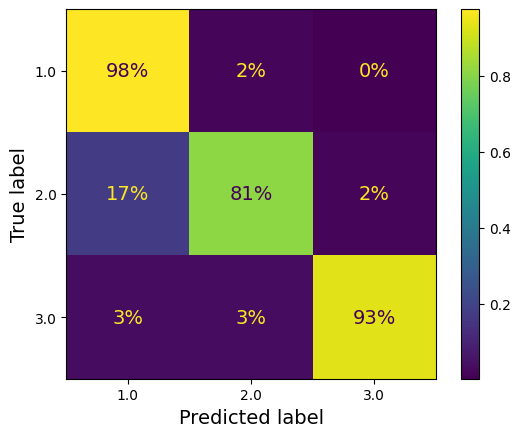

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=nsp_values, normalize='true', values_format='.0%')

Bekijk de confusion matrix goed. Hoewel de accuracy best ok lijkt, zijn de feitelijke resultaten niet goed.

Stel dat we NSP = 2 (Suspect) en 3 (Pathologisch) zonder onderscheid volledig samennemen als zijnde Positief (~ er is iets aan de hand) en NSP = 1 (Normaal) beschouwen als zijnde Negatief (~ er is niets aan de hand).  
Bereken en geef dan de precision op basis van de voorgaande numerieke confusion matrix.

precision = TP / (TP + FN)

In [18]:
precision = (conf_mx[1][1] + conf_mx[2][2] + conf_mx[1][2] + conf_mx[2][1]) /  \
            (conf_mx[1][1] + conf_mx[2][2] + conf_mx[1][2] + conf_mx[2][1] + conf_mx[0][1] + conf_mx[0][2])

precision


np.float64(0.9101123595505618)

Bereken en geef dan de recall op basis van de voorgaande confusion matrix.

In [ ]:
recall = TP  / (TP + FN)

In [19]:
recall = (conf_mx[1][1] + conf_mx[2][2] + conf_mx[1][2] + conf_mx[2][1]) /  \
            (conf_mx[1][1] + conf_mx[2][2] + conf_mx[1][2] + conf_mx[2][1] + conf_mx[1][0] + conf_mx[2][0])

In [20]:
recall

np.float64(0.8709677419354839)

Wat is belangrijker in dit geval: precision of recall? Leg kort uit.

In [ ]:
# recall

Wat is een mogelijke verklaring voor de slechte resultaten?

Teken de ROC curve voor de testset en bereken de AUC voor de binaire classifier waarbij negatief beschouwd wordt als NSP = 1 en positief als NSP = 2 of 3. Herwerk hiervoor de dataset. 
Aangezien Random Forest geen decision function heeft, moeten we gebruik maken van de functie `predict_proba()` op de classifier. 

In [23]:
y_train_23 = [2 if x in [2,3] else 1 for x in y_train]
y_test_23 = [2 if x in [2,3] else 1 for x in y_test]

In [24]:
y_train_23[:10]

[1, 2, 1, 1, 1, 1, 1, 1, 1, 1]

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 9 (3×3) combinations of hyperparameters with bootstrap set as True (default)
    {'n_estimators': [3, 10, 30], 'max_features': [4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,scoring='accuracy', cv=5)

grid_rf.fit(X_train_num_scaled_df, y_train_23)

print(grid_rf.best_estimator_)
print(grid_rf.best_params_)
print(grid_rf.best_score_)

RandomForestClassifier(max_features=6, n_estimators=30, random_state=42)
{'max_features': 6, 'n_estimators': 30}
0.9452941176470588


In [30]:
y_scores = grid_rf.predict_proba(X_test_num_scaled_df)
y_scores = y_scores[:,1]
y_scores[:10]

array([0.        , 0.        , 0.06666667, 0.        , 0.        ,
       1.        , 0.        , 0.96666667, 0.83333333, 1.        ])

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_23, y_scores, pos_label=2)

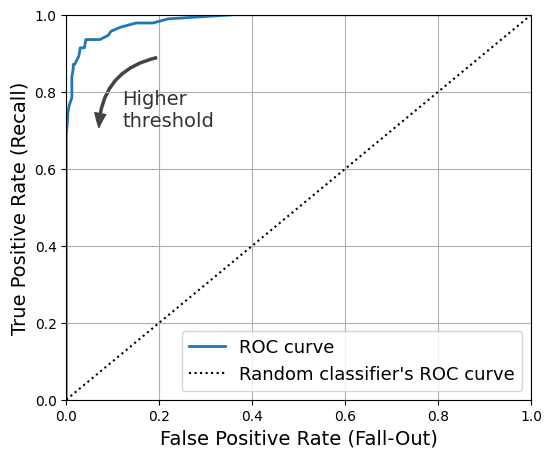

In [33]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

# extra code – just beautifies the figure with the curved arrow
plt.gca().add_patch(patches.FancyArrowPatch(
     (0.20, 0.89), (0.07, 0.70),
     connectionstyle="arc3,rad=.4",
     arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
     color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_23, y_scores)

np.float64(0.986793244857761)